<div class='alert alert-success'>
    <h1 align="center">Chapter 7: Support Vector Machines</h1> 
    <h3 align="center">Machine Learning Course (Fall 2018)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ml-2018/'>ML2018</a></h5>
</div>

## Introduction

- Motivation: optimal decision boundary
- Support vectors and margin
- Objective function: maximizing margin
- Non-linear classification: soft matgin
- Kernel Trick for non-linear classification
- Multi-class SVM

In [1]:
%matplotlib nbagg

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# our libraries
from utils import plot_svc_decision_function

## Motivation: Optimal Decision Boundary

- Support Vector Machines (SVMs) are powerful supervised learning algorithms used both for **classification** or for **regression**. 
- SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data.

#### Create dataset

Let's show a quick example of support vector classification. First we need to create a dataset:

<IPython.core.display.Javascript object>


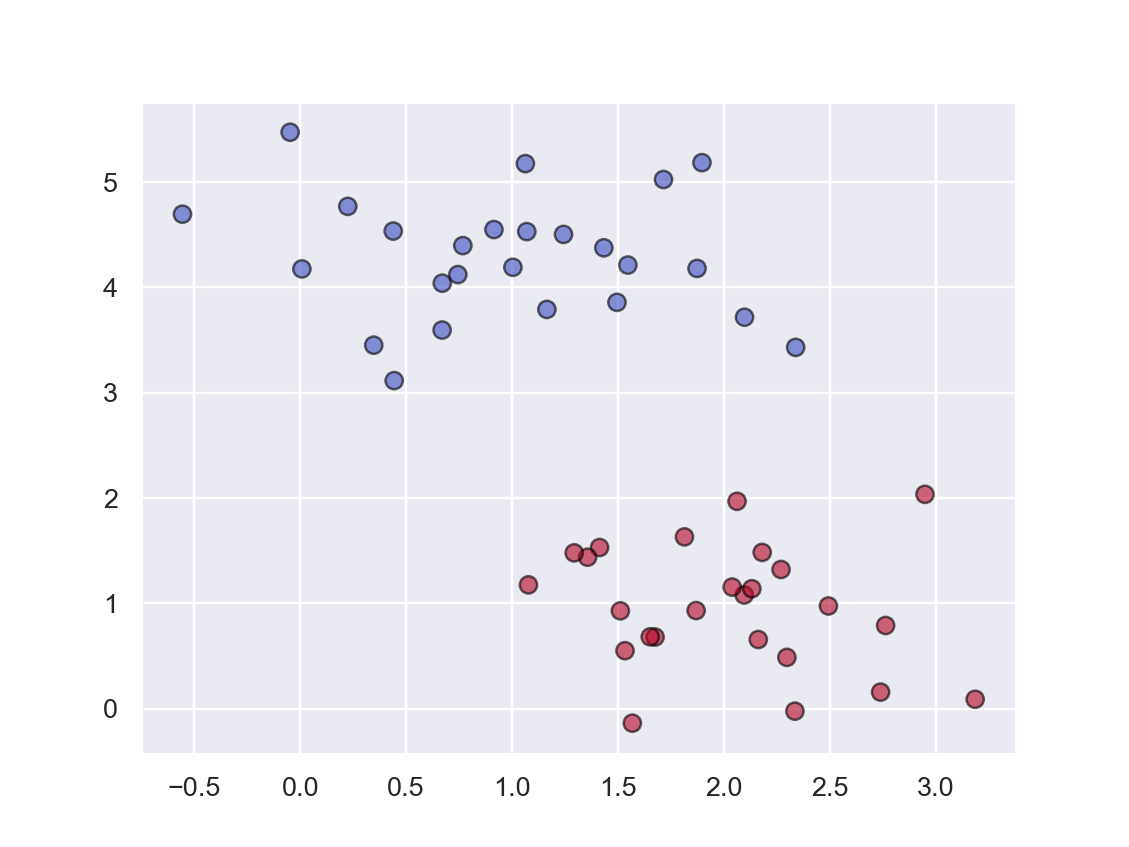

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.show()

#### Decision Boundary

- When the data are **linearly separable**, one can draw many different linear decision boundary that all of them correctly classify training data.
- But the important question is which one is optimal?

<IPython.core.display.Javascript object>


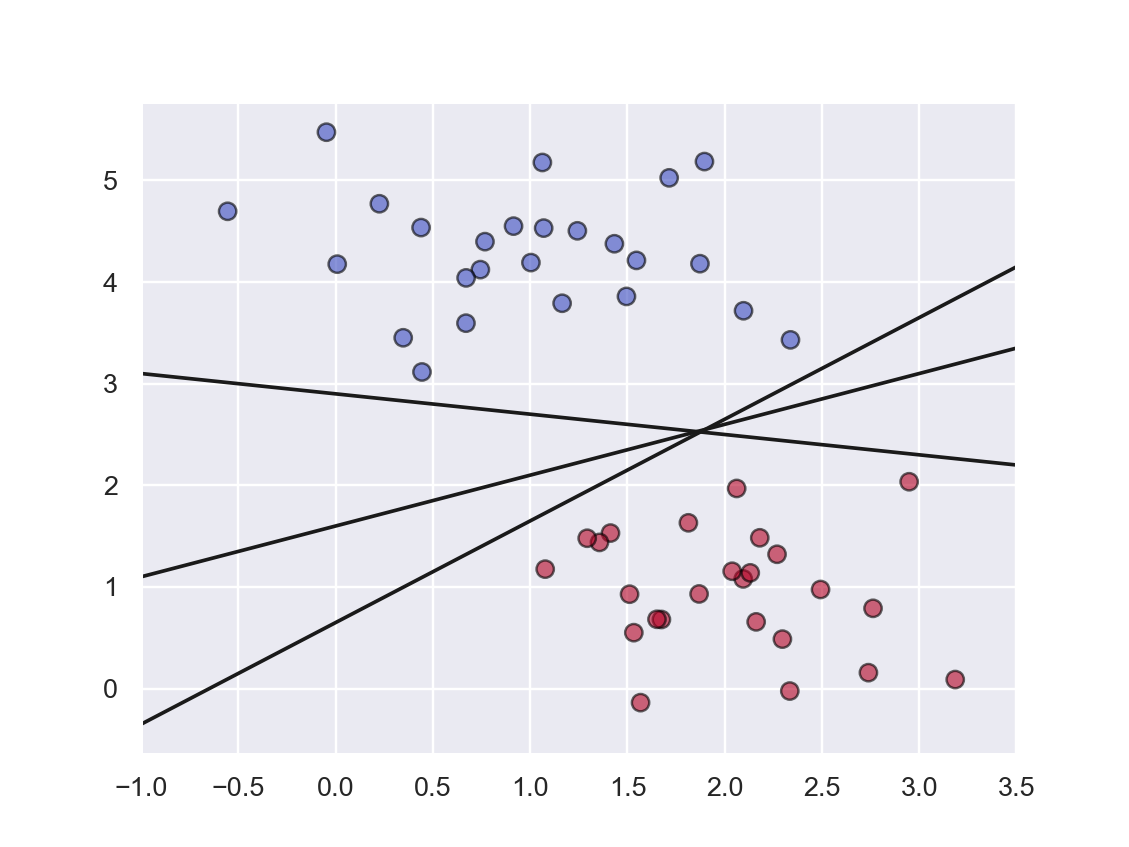

In [3]:
# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)

# draw three different separators
x_values = np.linspace(-1, 3.5)
for w, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(x_values, w * x_values + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

### Support Vector Machines: Maximizing the *Margin*

- Support vector machines are one way to address this quesion.
- What support vector machined do is to not only draw a line, but consider a *region* about the line of some given width.

Here's an example of what it might look like:

<IPython.core.display.Javascript object>


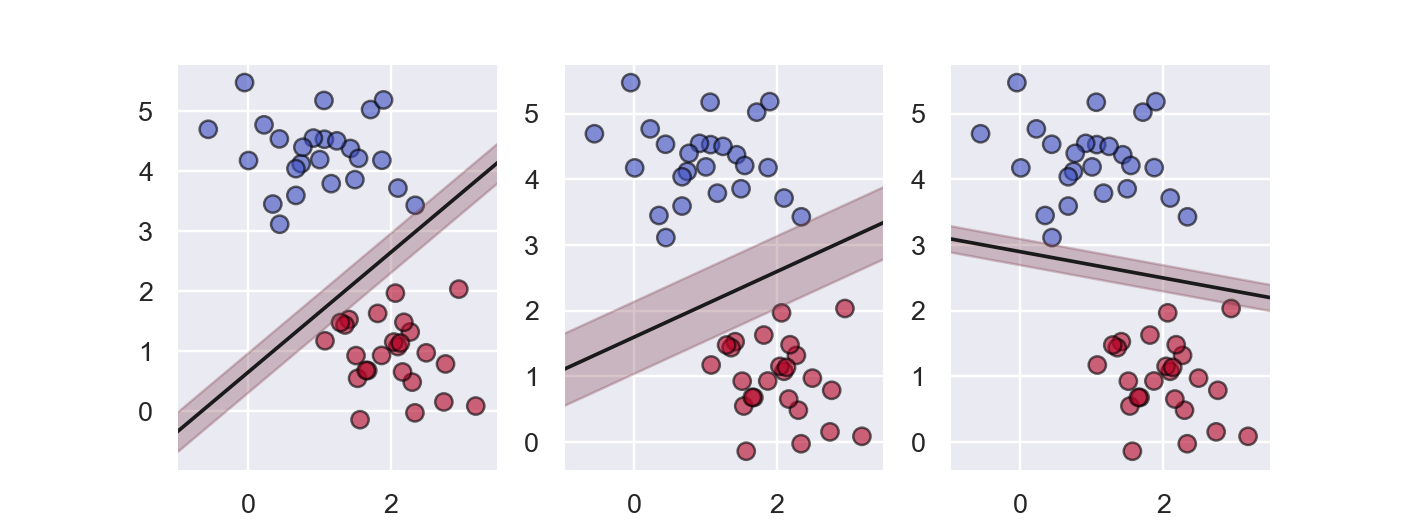

In [4]:
plt.figure(figsize=(8, 3))

# draw separators and margins
x_values = np.linspace(-1, 3.5)
for i, (w, b, m) in enumerate([(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]):
    plt.subplot(1, 3, i + 1)
    
    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    y_values = w * x_values + b
    
    # draw separator and margin
    plt.plot(x_values, y_values, '-k')
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='#7D3C4A', alpha=0.3)
    plt.xlim(-1, 3.5)

plt.show()

#### Fitting a Support Vector Machine

Here, we'll use scikit-learn to train a SVM classifier.

In [5]:
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(kernel='linear')

# train the classifier
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Plot decision boundary for SVM

<IPython.core.display.Javascript object>


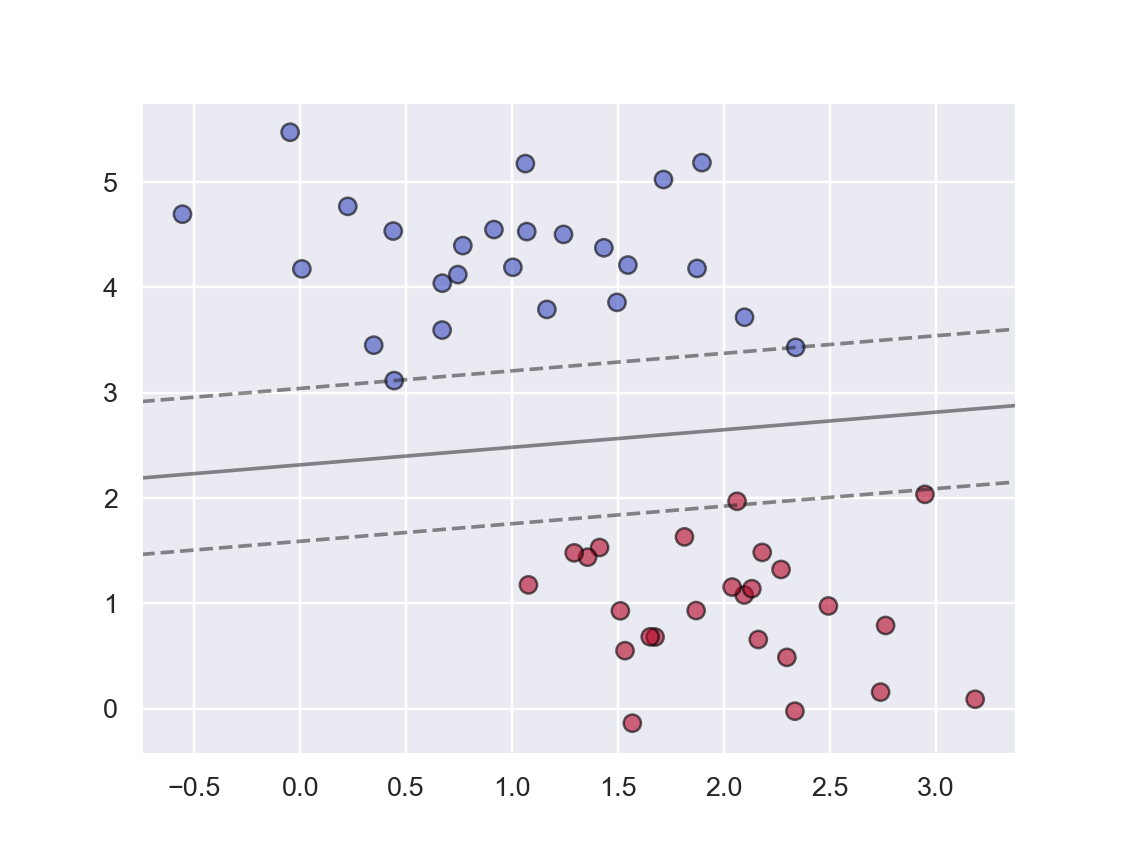

In [6]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.show()

### Support Vectors

- Notice that the dashed lines touch a couple of the points: these points are the pivotal pieces of this fit, and are known as the *support vectors* (giving the algorithm its name).

In scikit-learn, these are stored in the ``support_vectors_`` attribute of the classifier:

<IPython.core.display.Javascript object>


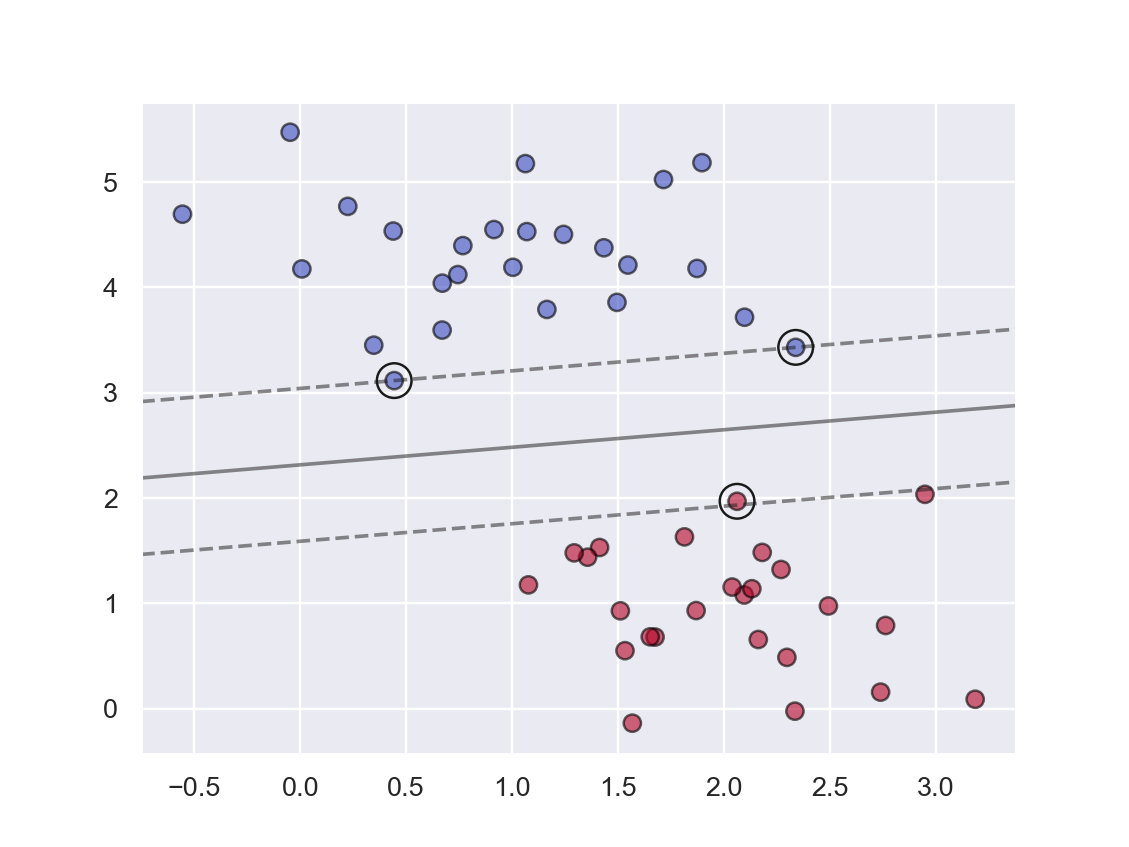

In [7]:
plt.figure()
# plot data and margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

Let's explore how the distribution of points affects the support vectors and the decision boundary.

<IPython.core.display.Javascript object>


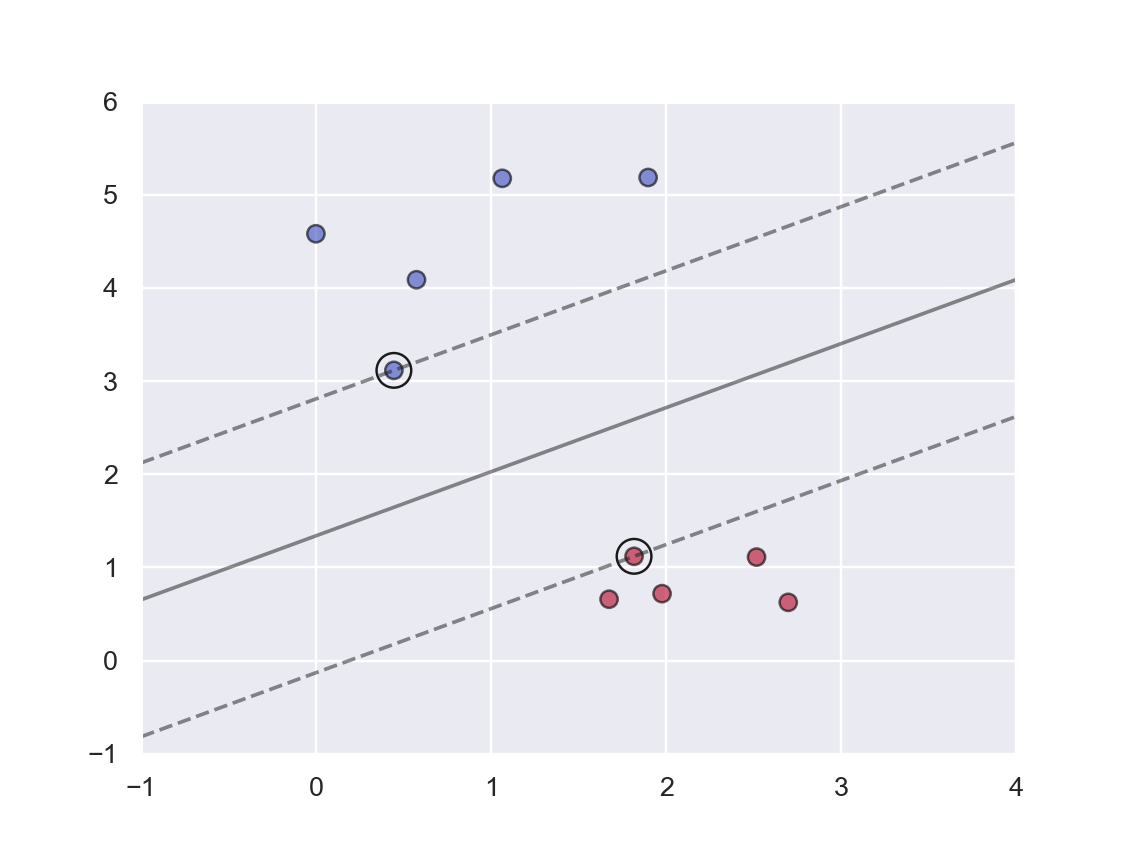

interactive(children=(IntSlider(value=10, description='N:', max=200, min=10, step=10), Output()), _dom_classes…

In [8]:
fig, ax = plt.subplots(1)


def plot_svm(N=10):
    ax.clear()
    
    # create data and classify
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear', gamma='scale', C=1e5)
    clf.fit(X, y)
    
    # show classification result
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
    plt.show()
    
N = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N:')
widgets.interact(plot_svm, N=N, kernel='linear');

**Notice that only the support vectors matter**
- that is, if you moved any of the other points without letting them cross the decision boundaries, they would have no effect on the classification results!

## Soft Margin

<IPython.core.display.Javascript object>


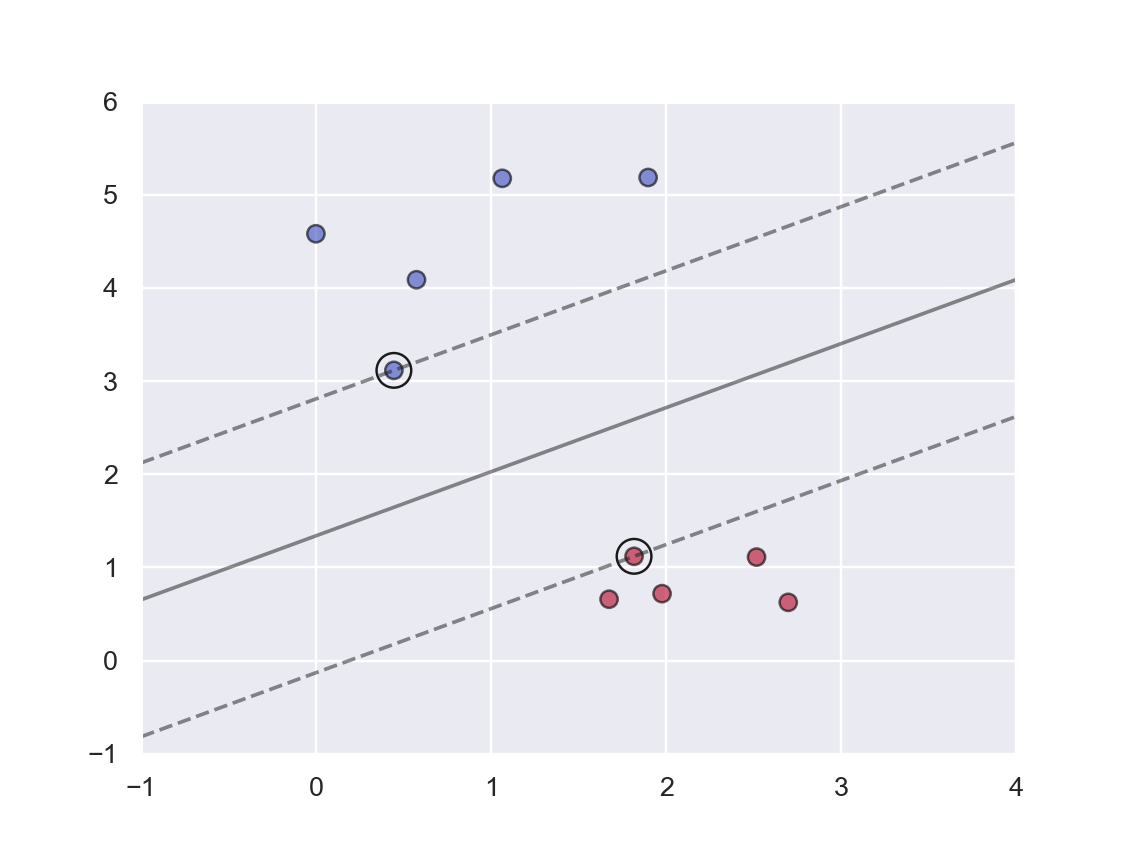

interactive(children=(IntSlider(value=10, description='N:', max=200, min=10, step=10), Output()), _dom_classes…

In [9]:
fig, ax = plt.subplots(1)


def plot_svm(N=10):
    ax.clear()
    
    # create data and classify
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear', gamma='scale', C=1)
    clf.fit(X, y)
    
    # display classification results
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
    plt.show()
    
N = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N:')
widgets.interact(plot_svm, N=N, kernel='linear');

## Non-linear Classiffication: Kernels

<IPython.core.display.Javascript object>


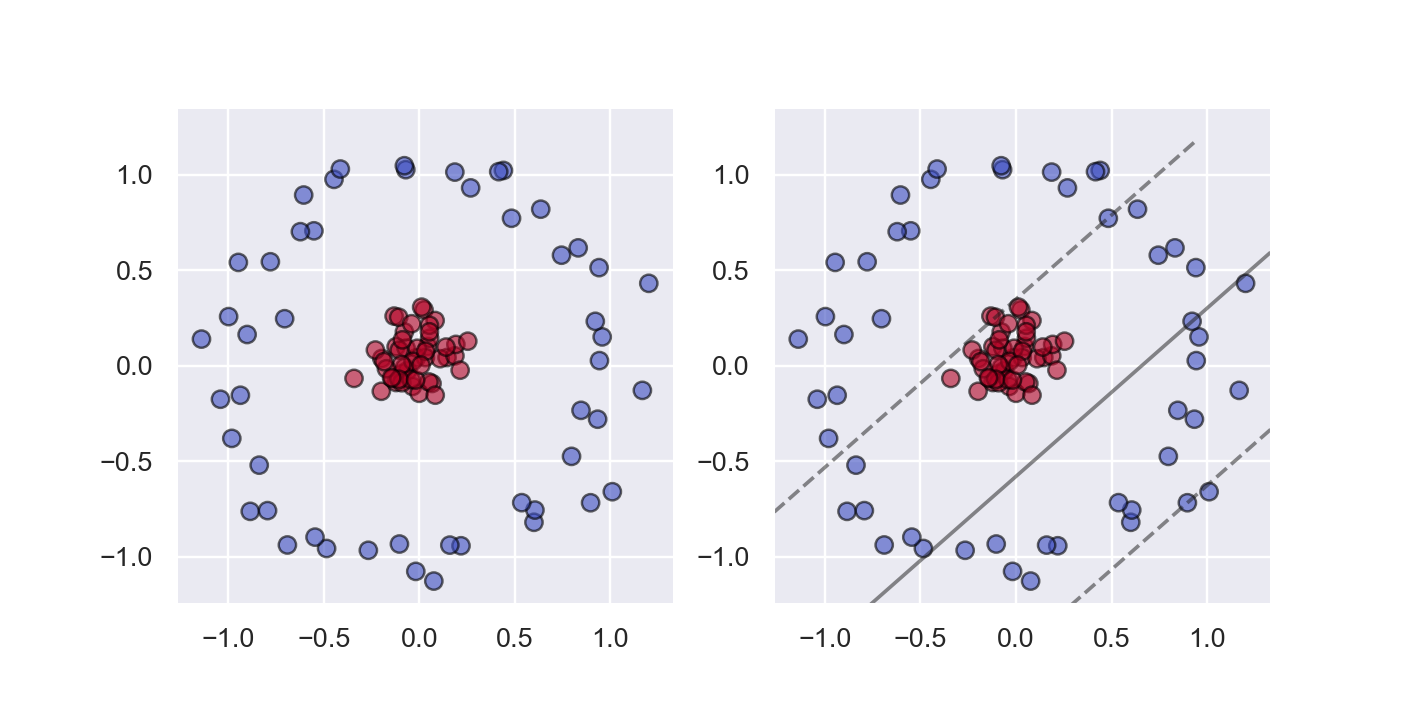

In [10]:
from sklearn.datasets.samples_generator import make_circles

# create dataset
X, y = make_circles(100, factor=.1, noise=.1, random_state=3)

# vreate and train classifier
clf = SVC(kernel='linear').fit(X, y)

# show classification results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plt.axis('square')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.axis('square');

**Kernel**: A functional transformation on input data.

#### kernel: radial basis function

$$r(x, 0) = e^{-(x_0^2 + x_1^2)}$$

<IPython.core.display.Javascript object>


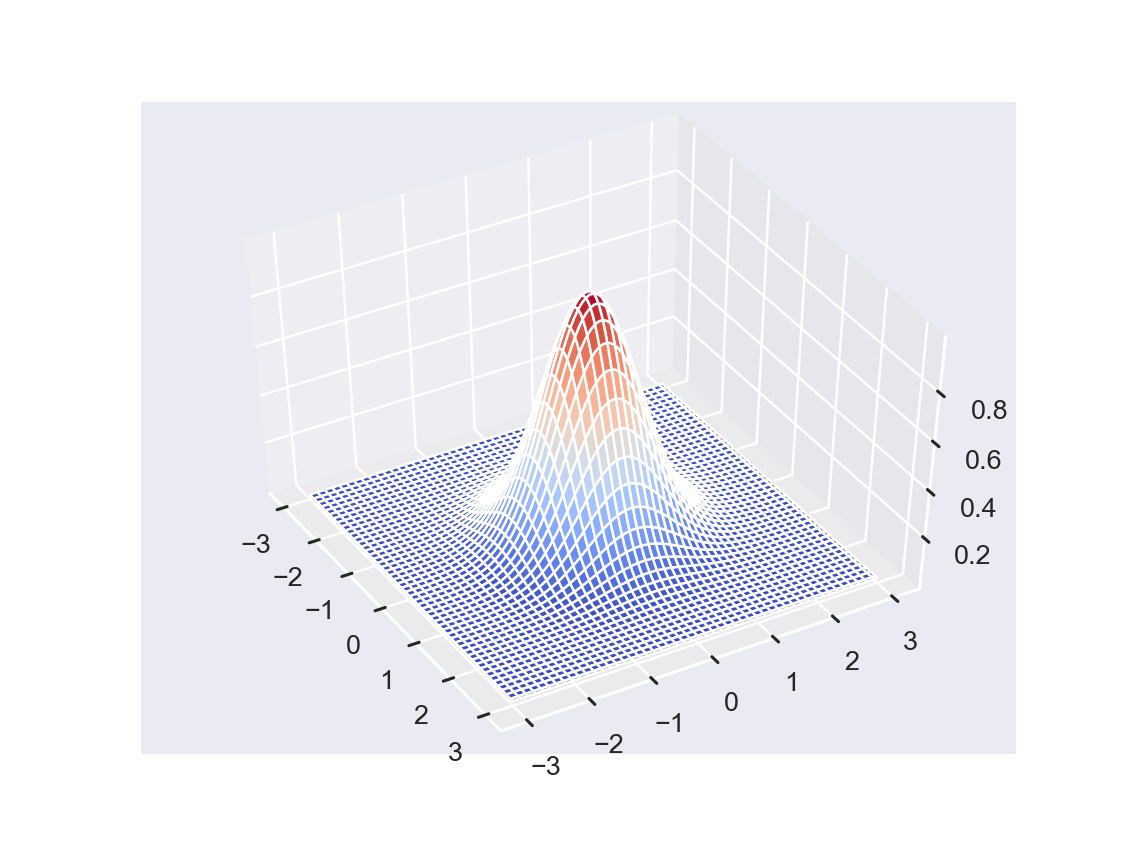

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
R = np.exp(-(X1 ** 2 + X2 ** 2))
ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
plt.show()

<IPython.core.display.Javascript object>


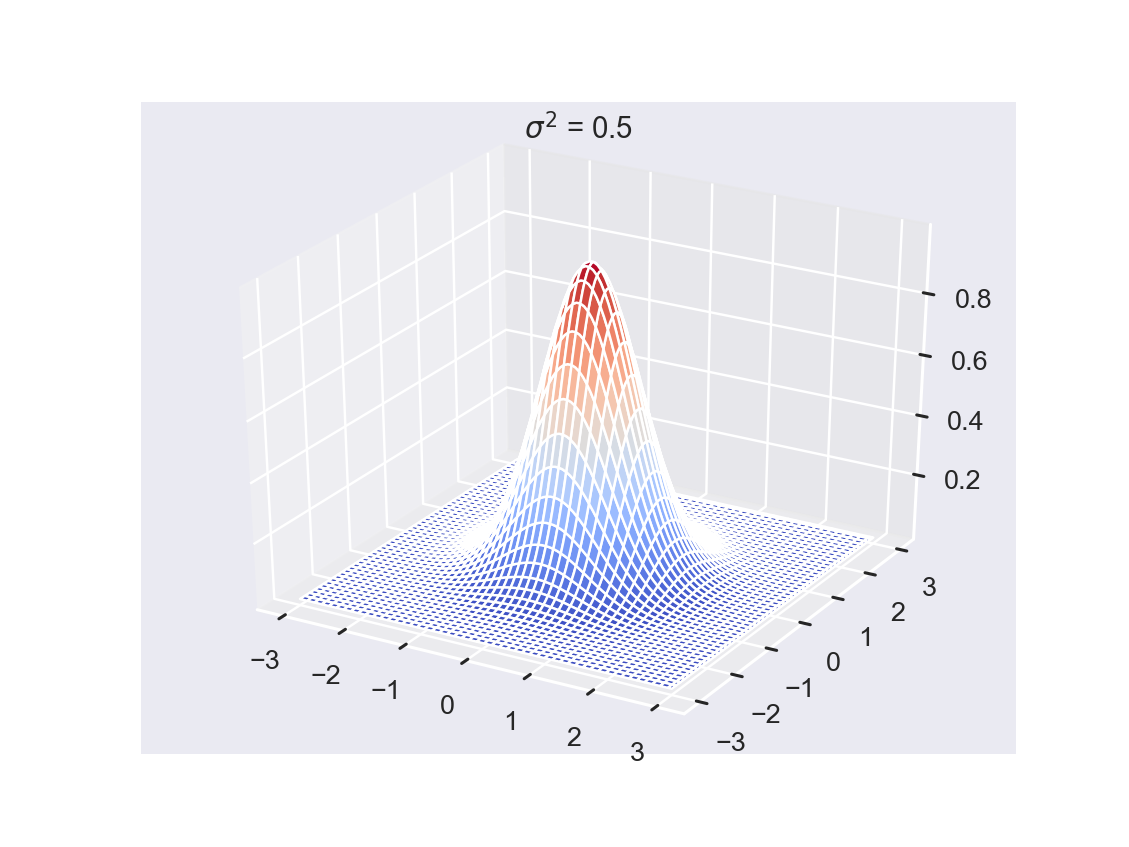

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 0.5
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

<IPython.core.display.Javascript object>


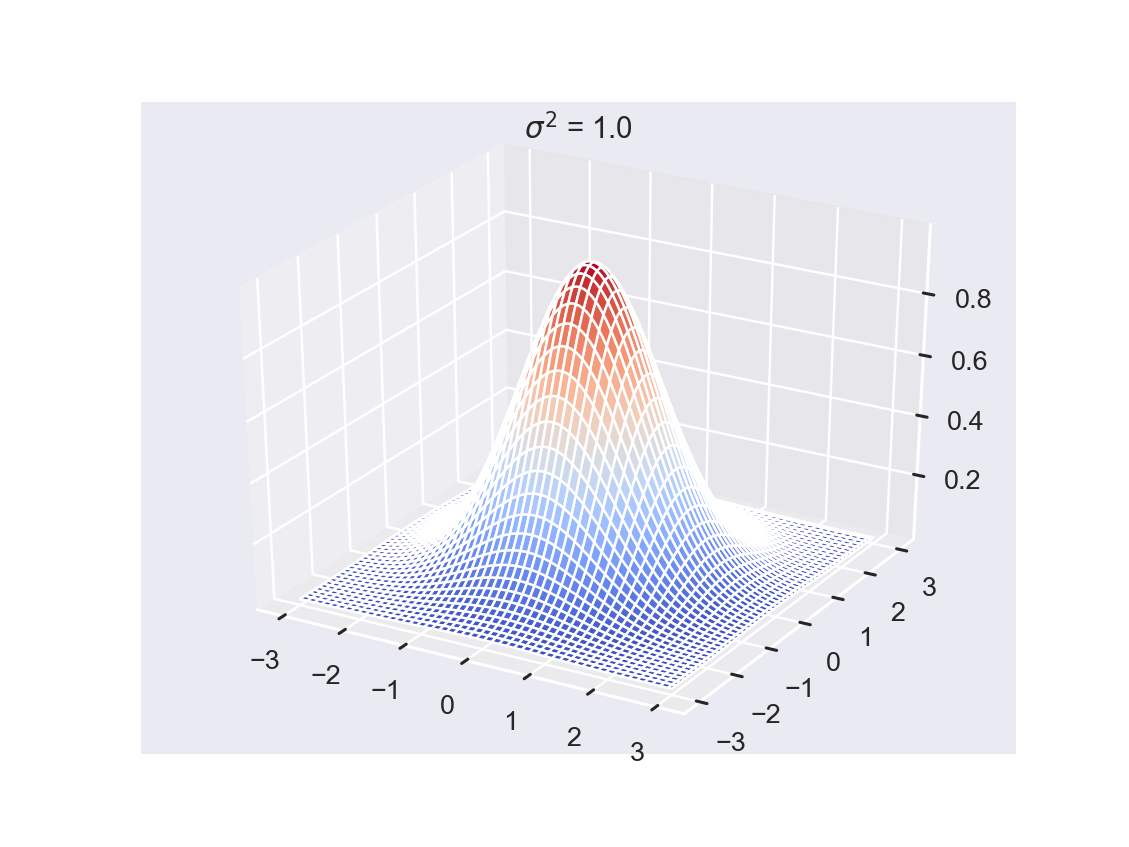

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 1.0
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

<IPython.core.display.Javascript object>


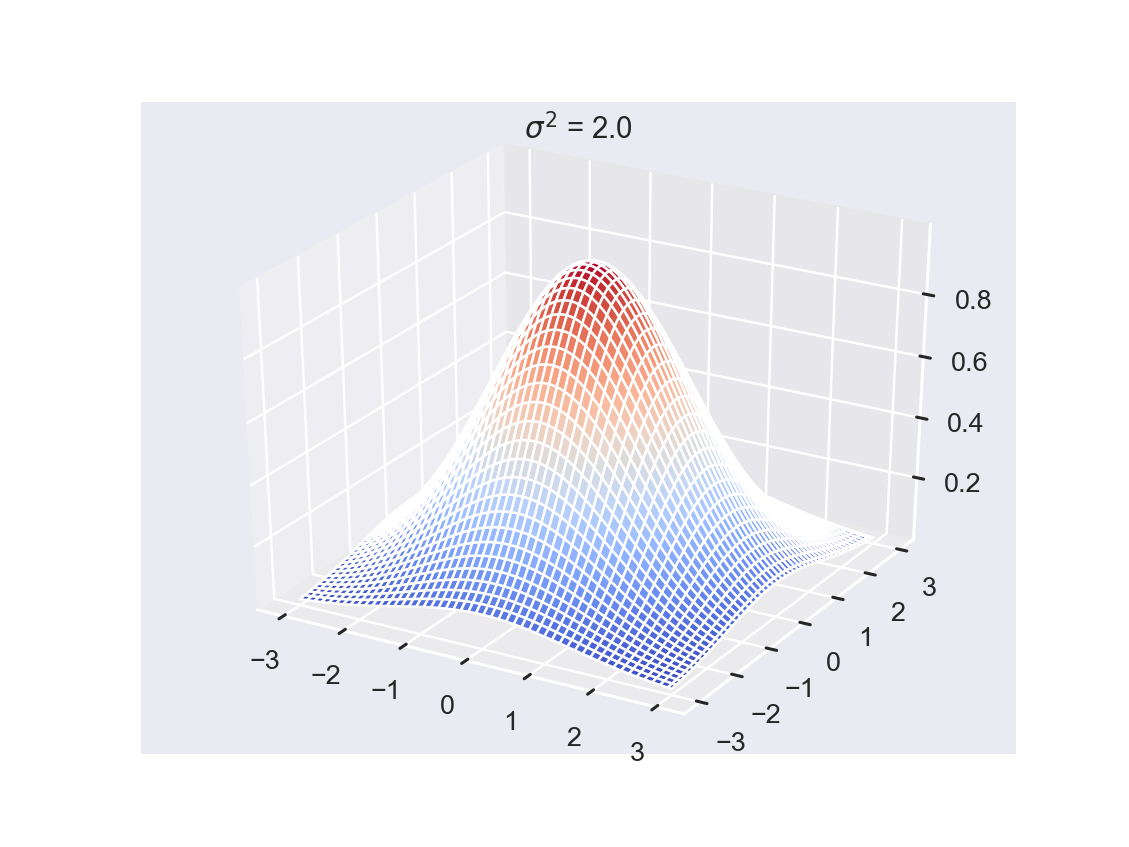

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 2.0
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

In [15]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

If we plot this along with our data, we can see the effect of it:

<IPython.core.display.Javascript object>


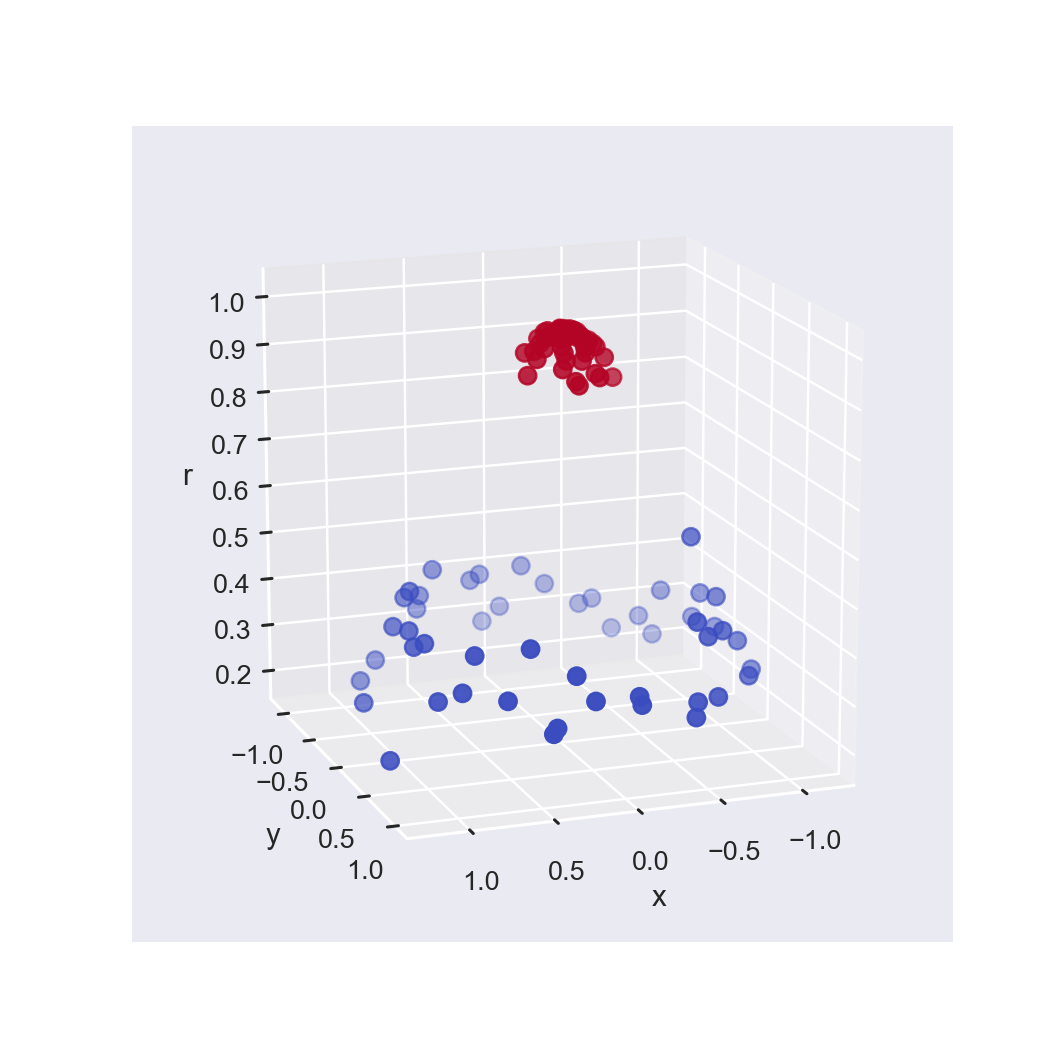

In [16]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='coolwarm')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

<IPython.core.display.Javascript object>


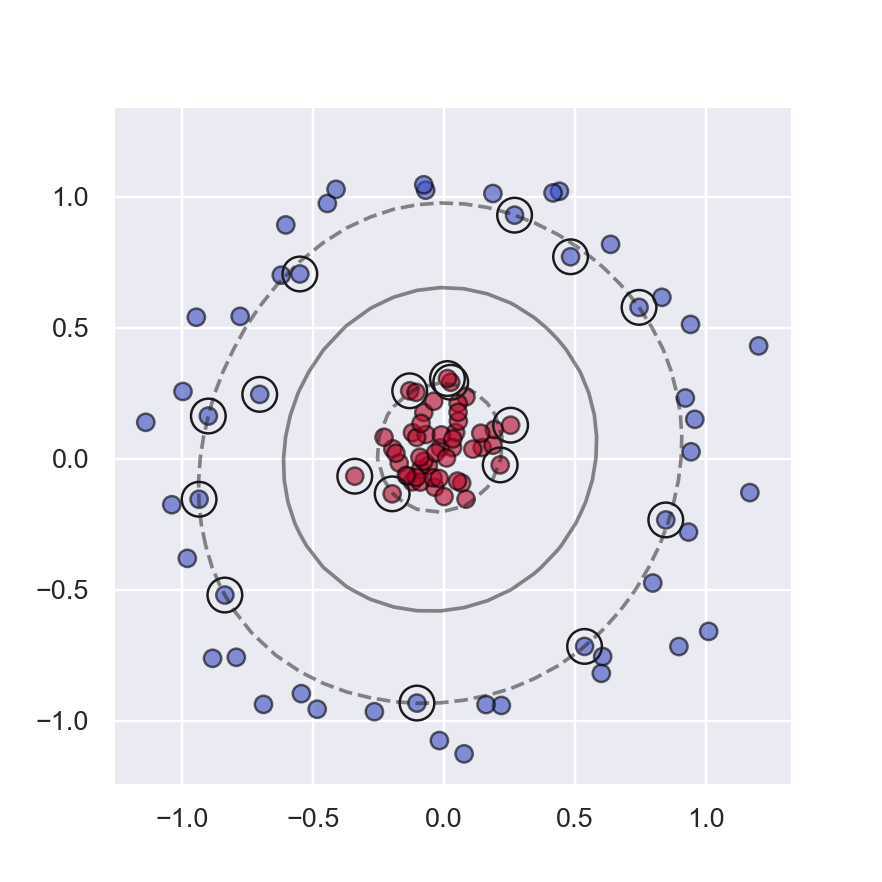

In [17]:
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X, y)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
plt.axis('square')
plt.show()